# Corto 1 
## Marlon Tzorin - 20180072

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dat.csv')

In [7]:
df.columns = ["A", "B", "C"]
df.head(3)

,A,B,C
0,0.796997,50.312938,2532.026902
1,1.115603,50.156194,2516.888332
2,1.064629,50.774814,2579.215190


In [8]:
df['A2'] = df['A'] ** 2
df['A3'] = df['A'] ** 3
df['A4'] = df['A'] ** 4
df['A5'] = df['A'] ** 5

df['B2'] = df['B'] ** 2
df['B3'] = df['B'] ** 3
df['B4'] = df['B'] ** 4
df['B5'] = df['B'] ** 5

In [9]:
df['cons'] = 1
y = df[['C']].to_numpy()
X = df[['cons','A','A2','B','B2']].to_numpy()

In [10]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

In [11]:
def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [12]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.0001, threshold=0.001, max_iter=10000): 
    
    theta = theta_0
    iteration = 0 
    costs = []
    thetas = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,theta)) > threshold and iteration < max_iter:
        iteration += 1 
        theta = theta - (learning_rate * linear_cost_gradient(X,y,theta))
        costs.append(linear_cost(X,y,theta))
        thetas.append(theta.copy())
        
    return theta, costs, thetas

In [13]:
m, n = X.shape
theta_0 = np.random.rand(n,1)
np.random.shuffle(X)
np.random.shuffle(y)

In [14]:
print(y.shape, X.shape)

(159999, 1) (159999, 5)


In [15]:
X_train = X[:96000]
X_cv = X[96000:128000]
X_test = X[128000:159999]
y_train = y[:96000]
y_cv = y[96000:128000]
y_test = y[128000:159999]

In [16]:
theta, costs, thetas = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient,0.00000000000001,0.001,50)

In [17]:
print(costs[len(costs)-1])

125944618.08759363


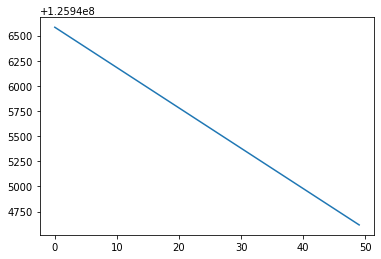

In [18]:
plt.plot(costs)

In [19]:
y2 = df[['C']].to_numpy()
X2 = df[['cons','A','A2','A3','A4','A5','B','B2','B3','B4','B5']].to_numpy()
np.random.shuffle(X2)
np.random.shuffle(y2)

In [20]:
X2_train = X2[:96000]
X2_cv = X2[96000:128000]
X2_test = X2[128000:159999]
y2_train = y2[:96000]
y2_cv = y2[96000:128000]
y2_test = y2[128000:159999]
m, n = X2.shape
theta_02 = np.random.rand(n,1)

In [80]:
theta2, costs2, thetas2 = gradient_descent(X2_train,y2_train,theta_02,linear_cost,linear_cost_gradient,0.00000000000000000000000000000000000000001,0.01,1000)

In [81]:
print(costs2[len(costs2)-1])

2.56916211238026e+21


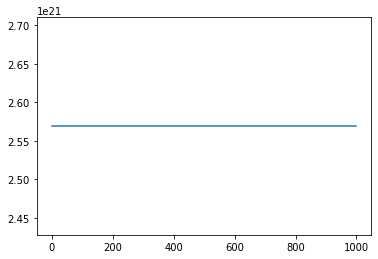

In [91]:
plt.plot(costs2)